# Анализ набора данных Auto MPG 
- Построить гистограммs и boxplot для выбранных непрерывных переменных.
- Вычислить описательную статистику (выборочное среднее, выборочная дисперсия, стандартное отклонение, медиана, 1-й и 3-й квартили) и попарных коэффициентов корреляции.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')

In [ ]:
columnNames = [
    'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
    'acceleration', 'model_year', 'origin', 'car_name'
]

autoMpgData = pd.read_csv(
    'datasets/auto-mpg.data',
    delim_whitespace=True,
    names=columnNames,
    na_values='?'
)
autoMpgData = autoMpgData.dropna().reset_index(drop=True)

print(f"Загружено наблюдений: {len(autoMpgData)}")
autoMpgData.head()

Загружено наблюдений: 398


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


Для Auto MPG возьмём следующие числовые переменные и отобразим краткую информацию по ним:

In [4]:
continuousFeatures = ['displacement', 'mpg', 'horsepower', 'weight', 'acceleration']
autoMpgData[continuousFeatures].describe()

,displacement,mpg,horsepower,weight,acceleration
count,398.000000,398.000000,392.000000,398.000000,398.000000
mean,193.425879,23.514573,104.469388,2970.424623,15.568090
std,104.269838,7.815984,38.491160,846.841774,2.757689
min,68.000000,9.000000,46.000000,1613.000000,8.000000
25%,104.250000,17.500000,75.000000,2223.750000,13.825000
50%,148.500000,23.000000,93.500000,2803.500000,15.500000
75%,262.000000,29.000000,126.000000,3608.000000,17.175000
max,455.000000,46.600000,230.000000,5140.000000,24.800000


Построение гистограмм и boxplot для каждой изучаемой переменной

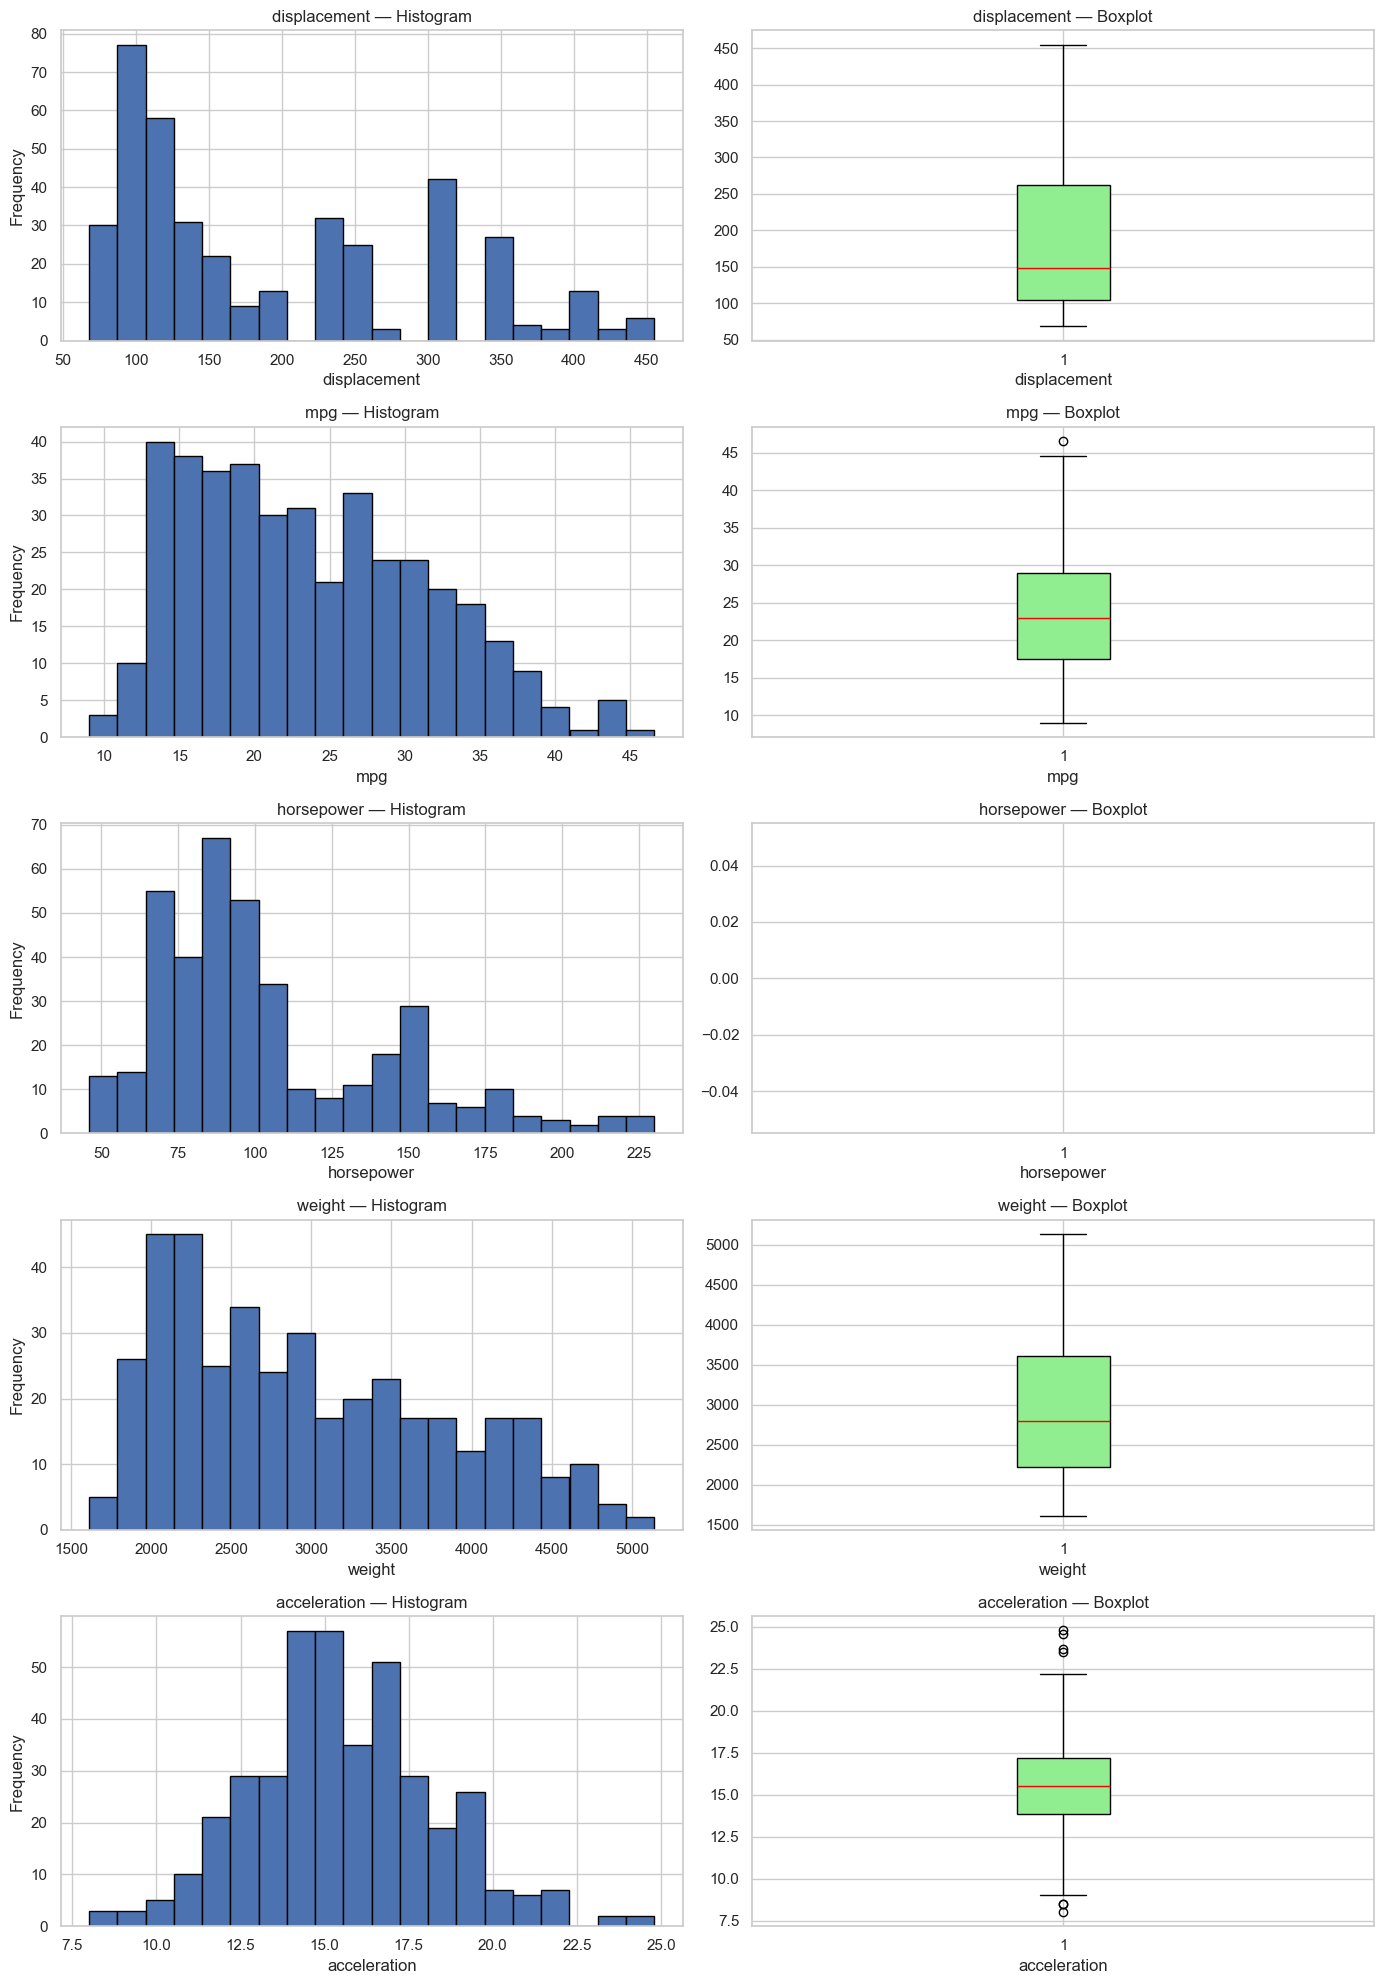

In [5]:
numVars = len(continuousFeatures)
fig, axes = plt.subplots(nrows=numVars, ncols=2, figsize=(14, 4 * numVars))

for i, col in enumerate(continuousFeatures):
    axes[i, 0].hist(autoMpgData[col], bins=20, edgecolor='black')
    axes[i, 0].set_title(f'{col} — Histogram')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')

    axes[i, 1].boxplot(autoMpgData[col], patch_artist=True,
                       boxprops=dict(facecolor='lightgreen', color='black'),
                       medianprops=dict(color='red'),
                       whiskerprops=dict(color='black'),
                       capprops=dict(color='black'))
    axes[i, 1].set_title(f'{col} — Boxplot')
    axes[i, 1].set_xlabel(col)

plt.tight_layout()
plt.show()

Вычисление описательной статистики (выборочное среднее, выборочная дисперсия (ddof=1), стандартное отклонение, медиана, 1-й и 3-й квартили)


In [6]:
def computeDescriptiveStats(dataFrame, columnsList):
    statsDict = {
        'mean': dataFrame[columnsList].mean(),
        'variance': dataFrame[columnsList].var(ddof=1),
        'stdDev': dataFrame[columnsList].std(ddof=1),
        'median': dataFrame[columnsList].median(),
        'skewness': autoMpgData[columnsList].skew(),
        'kurtosis': autoMpgData[columnsList].kurtosis(),
        'q1': dataFrame[columnsList].quantile(0.25),
        'q3': dataFrame[columnsList].quantile(0.75)
    }
    statsDataFrame = pd.DataFrame(statsDict)
    return statsDataFrame

summaryStats = computeDescriptiveStats(autoMpgData, continuousFeatures)
summaryStats

,mean,variance,stdDev,median,skewness,kurtosis,q1,q3
displacement,193.425879,10872.199152,104.269838,148.5,0.719645,-0.746597,104.250,262.000
mpg,23.514573,61.089611,7.815984,23.0,0.457066,-0.510781,17.500,29.000
horsepower,104.469388,1481.569393,38.491160,93.5,1.087326,0.696947,75.000,126.000
weight,2970.424623,717140.990526,846.841774,2803.5,0.531063,-0.785529,2223.750,3608.000
acceleration,15.568090,7.604848,2.757689,15.5,0.278777,0.419497,13.825,17.175


Попарные коэффициенты корреляции между переменными (матричная форма)

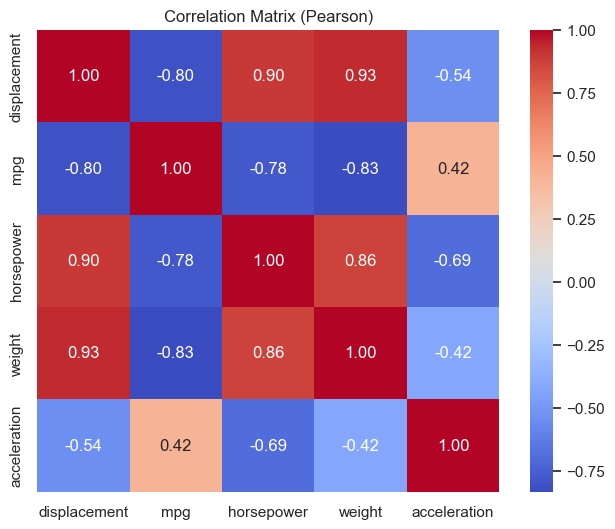

In [7]:
corrMatrix = autoMpgData[continuousFeatures].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corrMatrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix (Pearson)')
plt.show()


Попарные коэффициенты в табличном виде

In [8]:
corrPairs = corrMatrix.unstack().reset_index()
corrPairs.columns = ['Variable1', 'Variable2', 'Correlation']
corrPairsFiltered = corrPairs[corrPairs['Variable1'] < corrPairs['Variable2']].sort_values(by='Correlation', ascending=False)
corrPairsFiltered.reset_index(drop=True, inplace=True)
corrPairsFiltered

,Variable1,Variable2,Correlation
0,displacement,weight,0.932824
1,displacement,horsepower,0.897257
2,horsepower,weight,0.864538
3,acceleration,mpg,0.420289
4,acceleration,weight,-0.417457
5,acceleration,displacement,-0.543684
6,acceleration,horsepower,-0.689196
7,horsepower,mpg,-0.778427
8,displacement,mpg,-0.804203
9,mpg,weight,-0.831741
